In [27]:
import pyaudio
import wave
import numpy as np
import scipy
import librosa.display
import librosa
import matplotlib.pyplot as plt

In [72]:
# Stores an audio file for easy playback
class Audio():
    def __init__(self, filename):
        self.filename = filename
        self.chunk = 1024
        
        with wave.open(filename, 'rb'):
            # Divide by 2 for librosa's case
            self.rate = wf.getframerate() // 2
    
#     Return the sample size for the given duration
    def get_sample_size(self, duration):
        return self.rate * duration
    
#     Play the audio file for the given duration, play the whole file if duration is not given
    def play(self, duration=0):
        wf = wave.open(self.filename, 'rb')
        p = pyaudio.PyAudio()
        
        stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)
        
        if duration:
            d_chunk = duration * wf.getframerate()
            data = wf.readframes(d_chunk)
            stream.write(data)
        else:
            data = wf.readframes(self.chunk)

            while len(data) > 0:
                stream.write(data)
                data = wf.readframes(self.chunk)
        
        stream.close()
        p.terminate()
        wf.close()

In [73]:
wayne_1 = Audio("./working_data/wayne_test_1.wav")
wayne_2 = Audio("./working_data/wayne_test_2.wav")
wayne_3 = Audio("./working_data/wayne_test_3.wav")
wayne_4 = Audio("./working_data/wayne_sing_1.wav")
wayne_5 = Audio("./working_data/wayne_sing_2.wav")
wayne_6 = Audio("./working_data/wayne_sing_3.wav")

In [74]:
def display_linear_frequency_spectogram(audio, num_samples=5000):
    x, rate = librosa.load(audio.filename)
    x = x[:num_samples]
    
    D = librosa.amplitude_to_db(librosa.stft(x), ref=np.max)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectogram')
    plt.show()

In [75]:
def display_wave(audio, num_samples=5000):
    y, rate = librosa.load(audio.filename)
    y = y[:num_samples]
    
    x = np.arange(num_samples)
    
    plt.plot(x,y)
    plt.show()

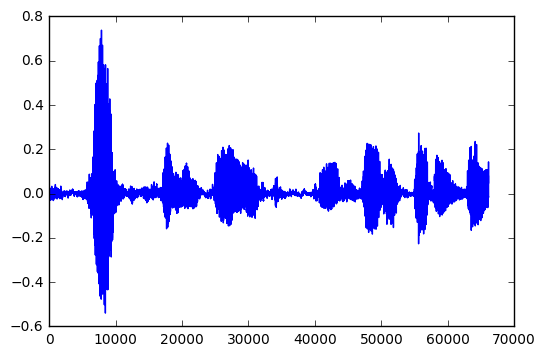

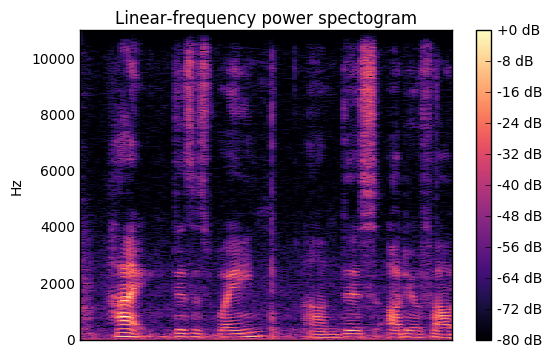

In [87]:
display_wave(wayne_1, wayne_1.get_sample_size(3))
display_linear_frequency_spectogram(wayne_1, wayne_1.get_sample_size(3))

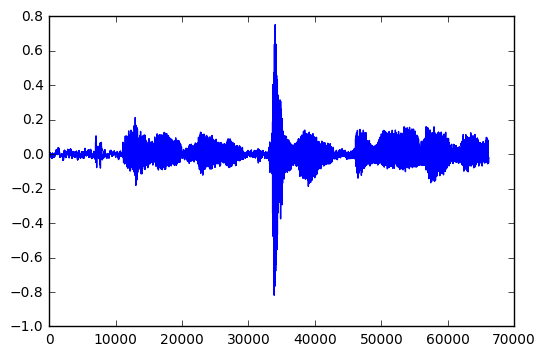

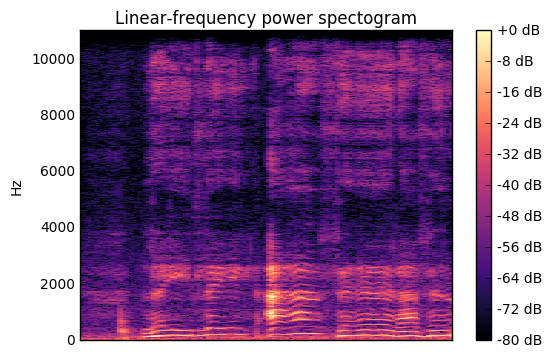

In [86]:
display_wave(wayne_4, wayne_4.get_sample_size(3))
display_linear_frequency_spectogram(wayne_4, wayne_4.get_sample_size(3))

In [82]:
ex_1 = Audio("./working_data/abbott_10.wav")
ex_2 = Audio("./working_data/optic_10.wav")
ex_3 = Audio("./working_data/aeschylus_10.wav")

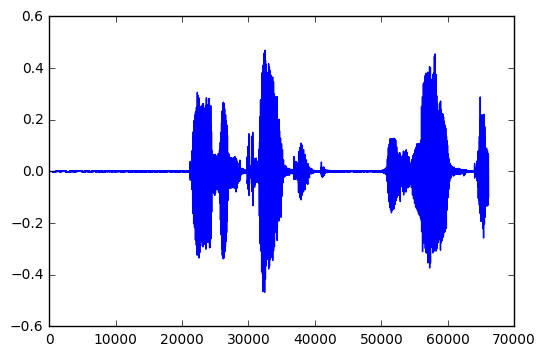

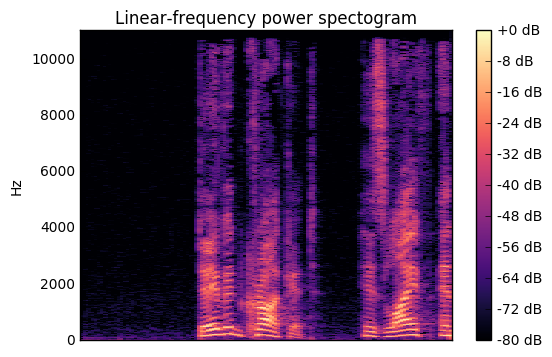

In [85]:
display_wave(ex_1, ex_1.get_sample_size(3))
display_linear_frequency_spectogram(ex_1, ex_1.get_sample_size(3))